In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#1. Load the dataset
pt_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project5_ET/parkinsons.data") 

In [4]:
pt_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
pt_df.eq(np.nan).any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [6]:
pt_df.eq(0).any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status               True
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

No NAN and Zeros values found in the data set. Only status columns has zeros which is denoting the outcome that patient is healthy or not.

In [7]:
pt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [8]:
pt_df.shape

(195, 24)

In [9]:
pt_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [10]:
pt_df.groupby(['status']).mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

In [11]:
pt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [0]:
pt_df.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64

In [16]:
pt_df.mode(axis=0, numeric_only=True)
#import statistics
#statistics.mode(pt_df)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,88.333,102.145,65.476,0.00369,0.00003,0.00169,0.00332,0.00507,0.01450,0.154,0.00469,0.00747,0.00903,0.01567,0.00231,8.441,1.0,0.256570,0.574282,-7.964984,0.210279,1.423287,0.044539
1,91.904,102.305,65.750,0.00694,NaN,NaN,NaN,NaN,0.01503,NaN,0.00522,0.00972,0.01133,0.01898,0.00340,8.867,NaN,0.263654,0.582710,-7.777685,NaN,1.512275,0.056141
2,95.056,107.715,65.782,0.00742,NaN,NaN,NaN,NaN,0.01608,NaN,0.00633,0.01024,0.01140,0.02184,0.00420,9.449,NaN,0.276850,0.605417,-7.695734,NaN,1.544609,0.057610
3,95.385,108.664,65.809,NaN,NaN,NaN,NaN,NaN,0.01725,NaN,0.00728,0.01144,0.01234,0.03831,0.00476,10.489,NaN,0.296888,0.623731,-7.682587,NaN,1.743867,0.068501
4,95.605,110.019,66.004,NaN,NaN,NaN,NaN,NaN,0.02293,NaN,0.00769,0.01160,0.01491,0.04451,0.00479,11.744,NaN,0.305062,0.626710,-7.517934,NaN,1.765957,0.073581
5,95.730,112.240,66.157,NaN,NaN,NaN,NaN,NaN,0.02448,NaN,0.00829,0.01219,0.03772,0.04736,0.00620,11.866,NaN,0.305429,0.627337,-7.496264,NaN,1.777901,0.075587
6,96.106,112.777,67.021,NaN,NaN,NaN,NaN,NaN,0.03273,NaN,0.01277,NaN,NaN,NaN,0.00681,12.298,NaN,0.306443,0.628058,-7.348300,NaN,1.821297,0.085569
7,98.804,113.597,67.343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01284,NaN,NaN,NaN,0.00839,12.359,NaN,0.311369,0.628232,-7.319510,NaN,1.827012,0.086398
8,100.770,113.840,68.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01441,NaN,NaN,NaN,0.01049,12.435,NaN,0.326480,0.630409,-7.314237,NaN,1.831691,0.091470
9,100.960,115.697,68.623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01484,NaN,NaN,NaN,0.07223,12.529,NaN,0.329577,0.631653,-7.310550,NaN,1.840198,0.091546


In [17]:
pt_df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

In [0]:
pt_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

This data contains 147 people suffering from PD and 48 healthy people

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


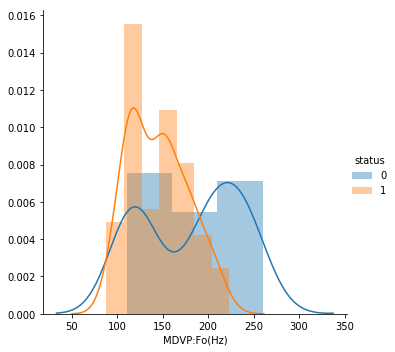

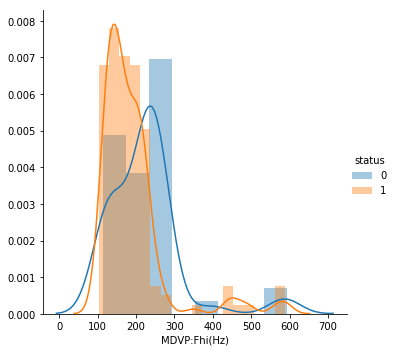

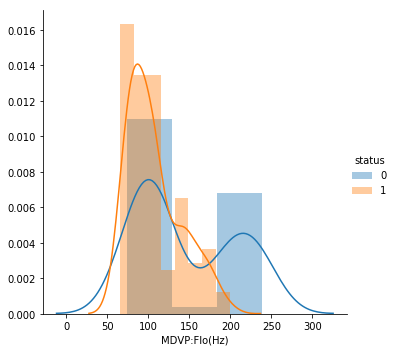

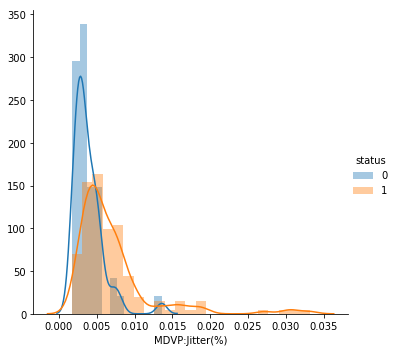

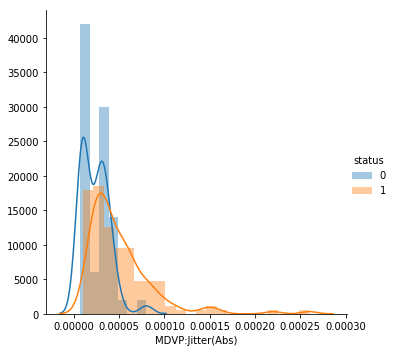

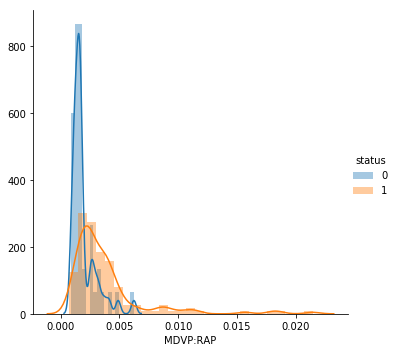

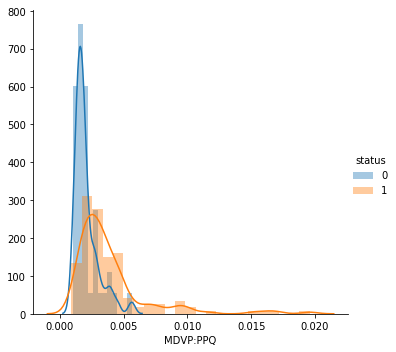

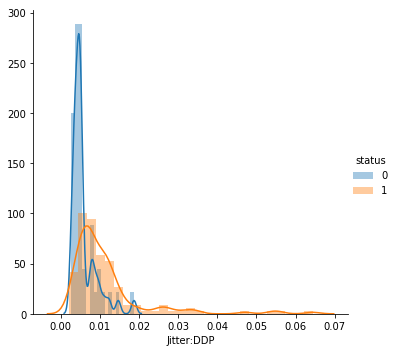

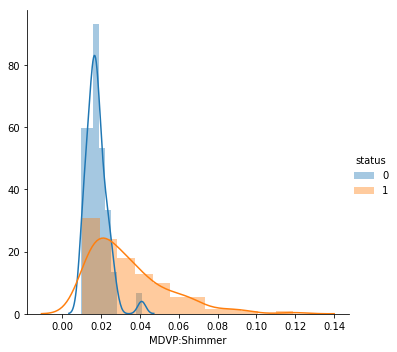

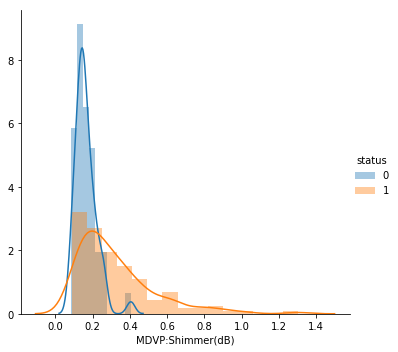

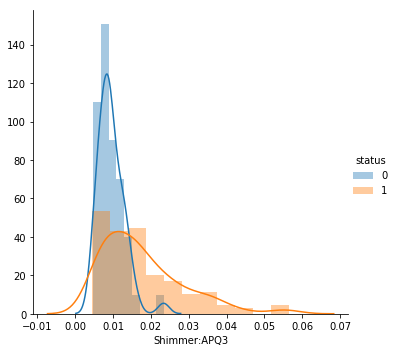

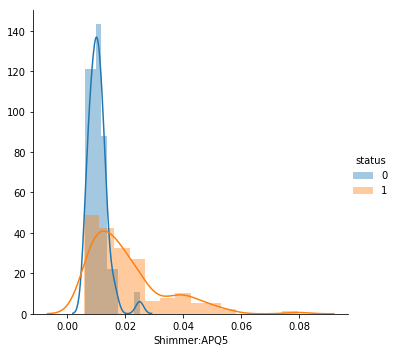

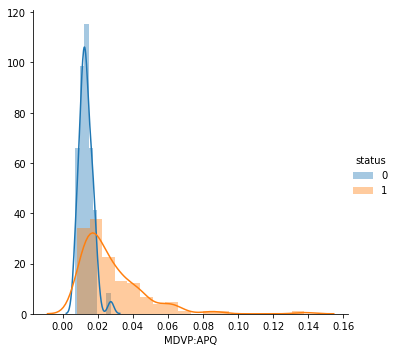

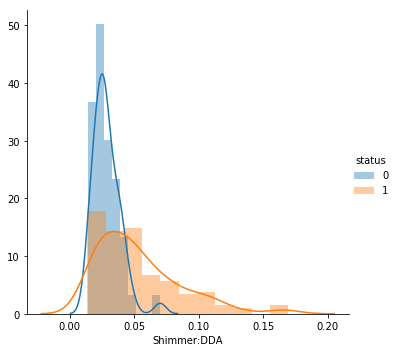

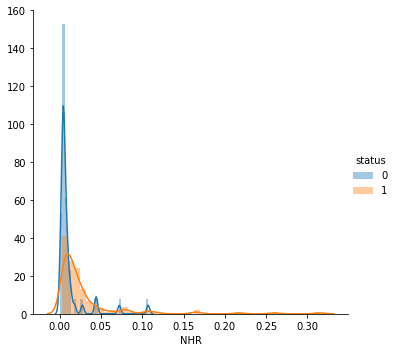

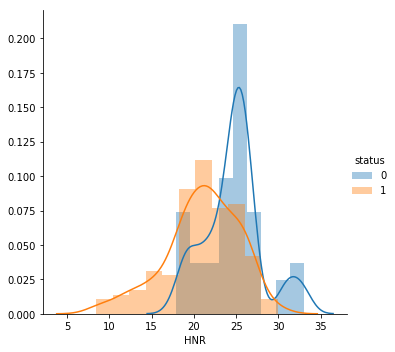

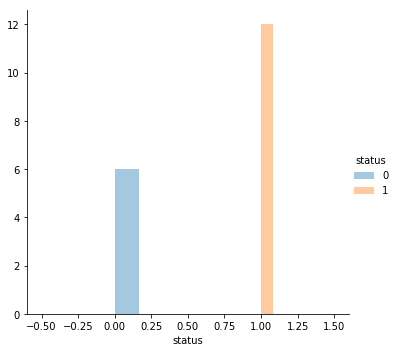

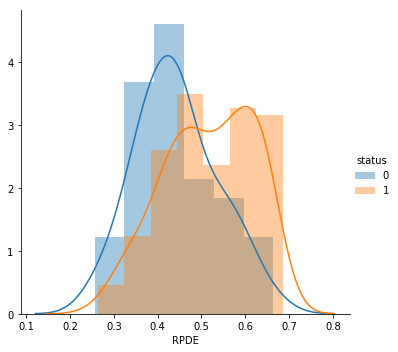

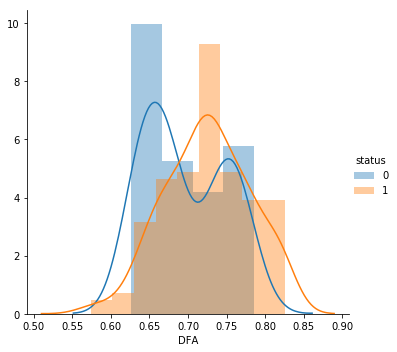

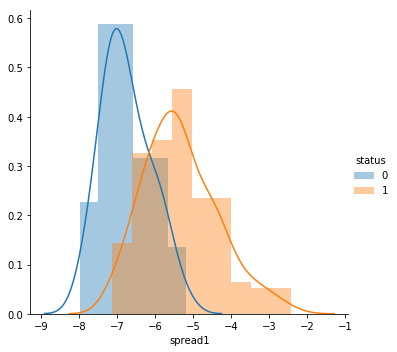

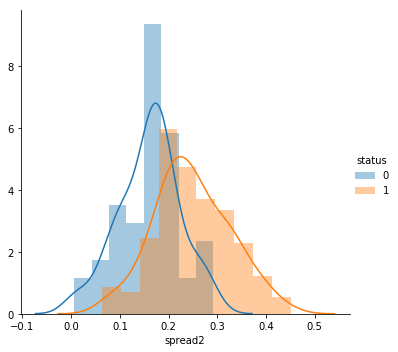

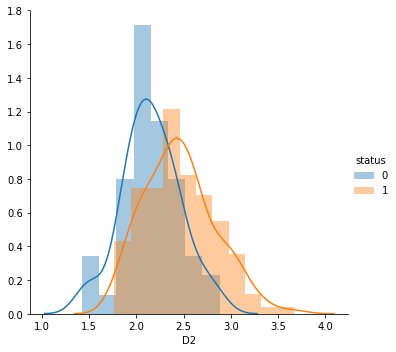

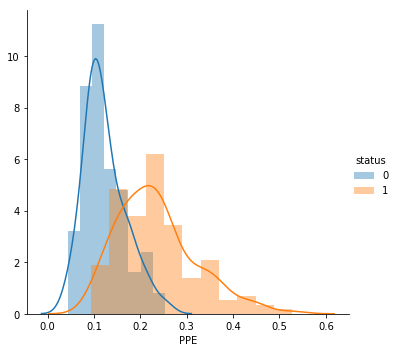

In [0]:
for x in range(1,pt_df.columns.size,):
  sns.FacetGrid(pt_df,hue="status",height=5).map(sns.distplot,pt_df.columns[x]).add_legend()

[]

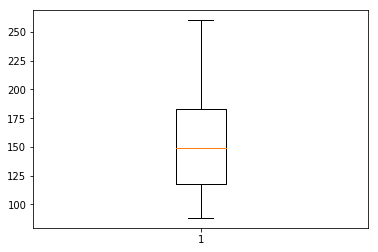

In [0]:
plt.boxplot(pt_df["MDVP:Fo(Hz)"])
plt.plot()

# No Outliers

In [0]:
pt_df.columns

[]

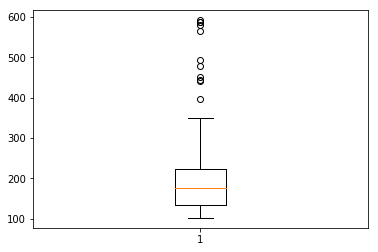

In [19]:
plt.boxplot(pt_df["MDVP:Fhi(Hz)"])
plt.plot()

# Outliers Present

[]

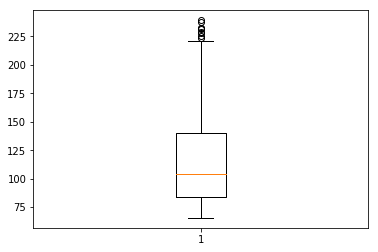

In [20]:
plt.boxplot(pt_df["MDVP:Flo(Hz)"])
plt.plot()
# Outliers Present

[]

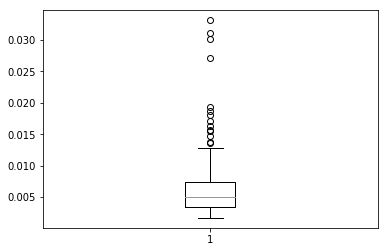

In [21]:
plt.boxplot(pt_df["MDVP:Jitter(%)"])
plt.plot()
# Outliers Present

[]

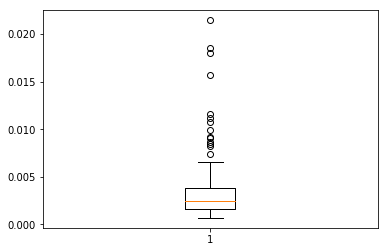

In [23]:
plt.boxplot(pt_df["MDVP:RAP"])
plt.plot()
# Outliers Present

[]

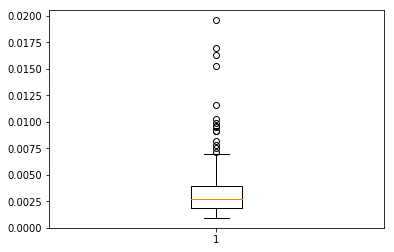

In [24]:
plt.boxplot(pt_df["MDVP:PPQ"])
plt.plot()
# Outliers Present

[]

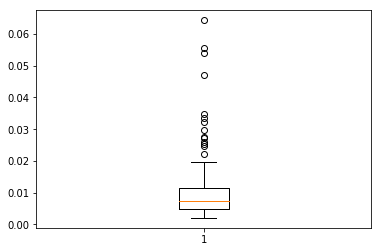

In [25]:
plt.boxplot(pt_df["Jitter:DDP"])
plt.plot()
# Outliers Present

[]

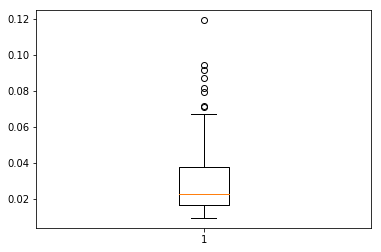

In [26]:
plt.boxplot(pt_df["MDVP:Shimmer"])
plt.plot()
# Outliers Present

[]

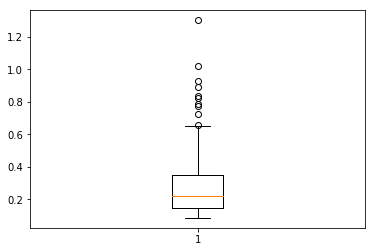

In [27]:
plt.boxplot(pt_df["MDVP:Shimmer(dB)"])
plt.plot()
# Outliers Present

[]

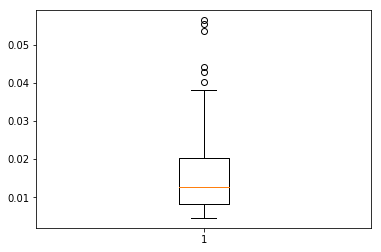

In [28]:
plt.boxplot(pt_df["Shimmer:APQ3"])
plt.plot()
# Outliers Present

[]

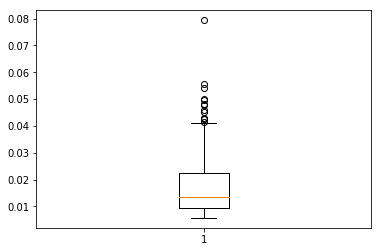

In [29]:
plt.boxplot(pt_df["Shimmer:APQ5"])
plt.plot()
# Outliers Present

[]

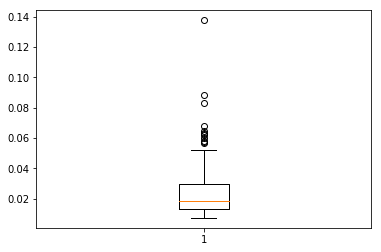

In [30]:
plt.boxplot(pt_df["MDVP:APQ"])
plt.plot()
# Outliers Present

[]

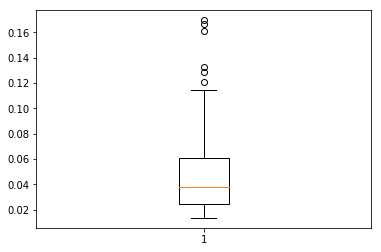

In [31]:
plt.boxplot(pt_df["Shimmer:DDA"])
plt.plot()
# Outliers Present

[]

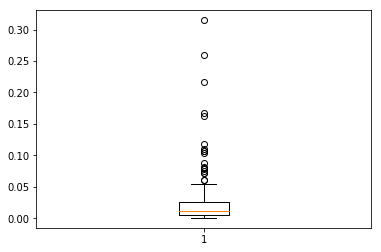

In [32]:
plt.boxplot(pt_df["NHR"])
plt.plot()
# Lots of Outliers Present

[]

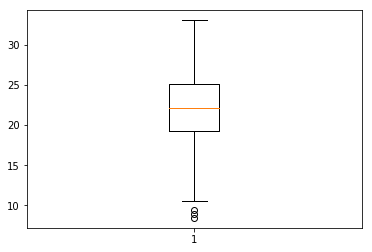

In [33]:
plt.boxplot(pt_df["HNR"])
plt.plot()
# Outliers Present

[]

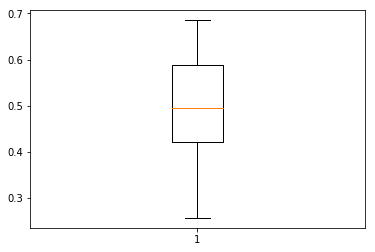

In [34]:
plt.boxplot(pt_df["RPDE"])
plt.plot()
# No Outliers Present

[]

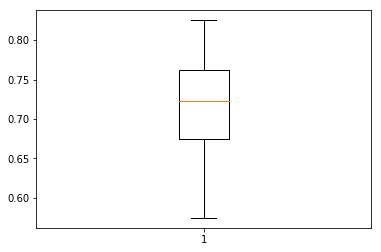

In [35]:
plt.boxplot(pt_df["DFA"])
plt.plot()
# No Outliers Present

[]

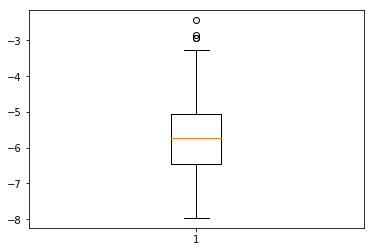

In [36]:
plt.boxplot(pt_df["spread1"])
plt.plot()
# Outliers Present

[]

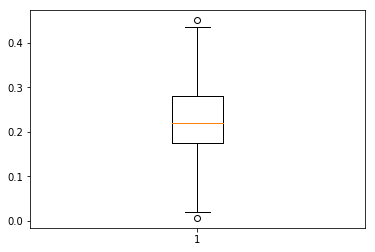

In [37]:
plt.boxplot(pt_df["spread2"])
plt.plot()
# Few Outliers Present

[]

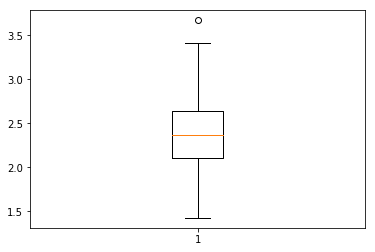

In [38]:
plt.boxplot(pt_df["D2"])
plt.plot()
# Few Outliers Present

[]

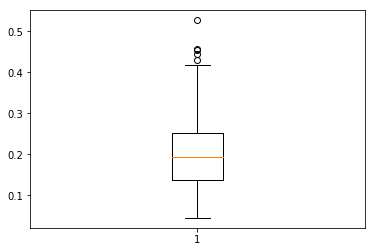

In [39]:
plt.boxplot(pt_df["PPE"])
plt.plot()
# Outliers Present

[]

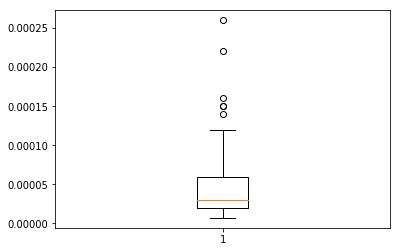

In [40]:
plt.boxplot(pt_df["MDVP:Jitter(Abs)"])
plt.plot()
# Outliers Present

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


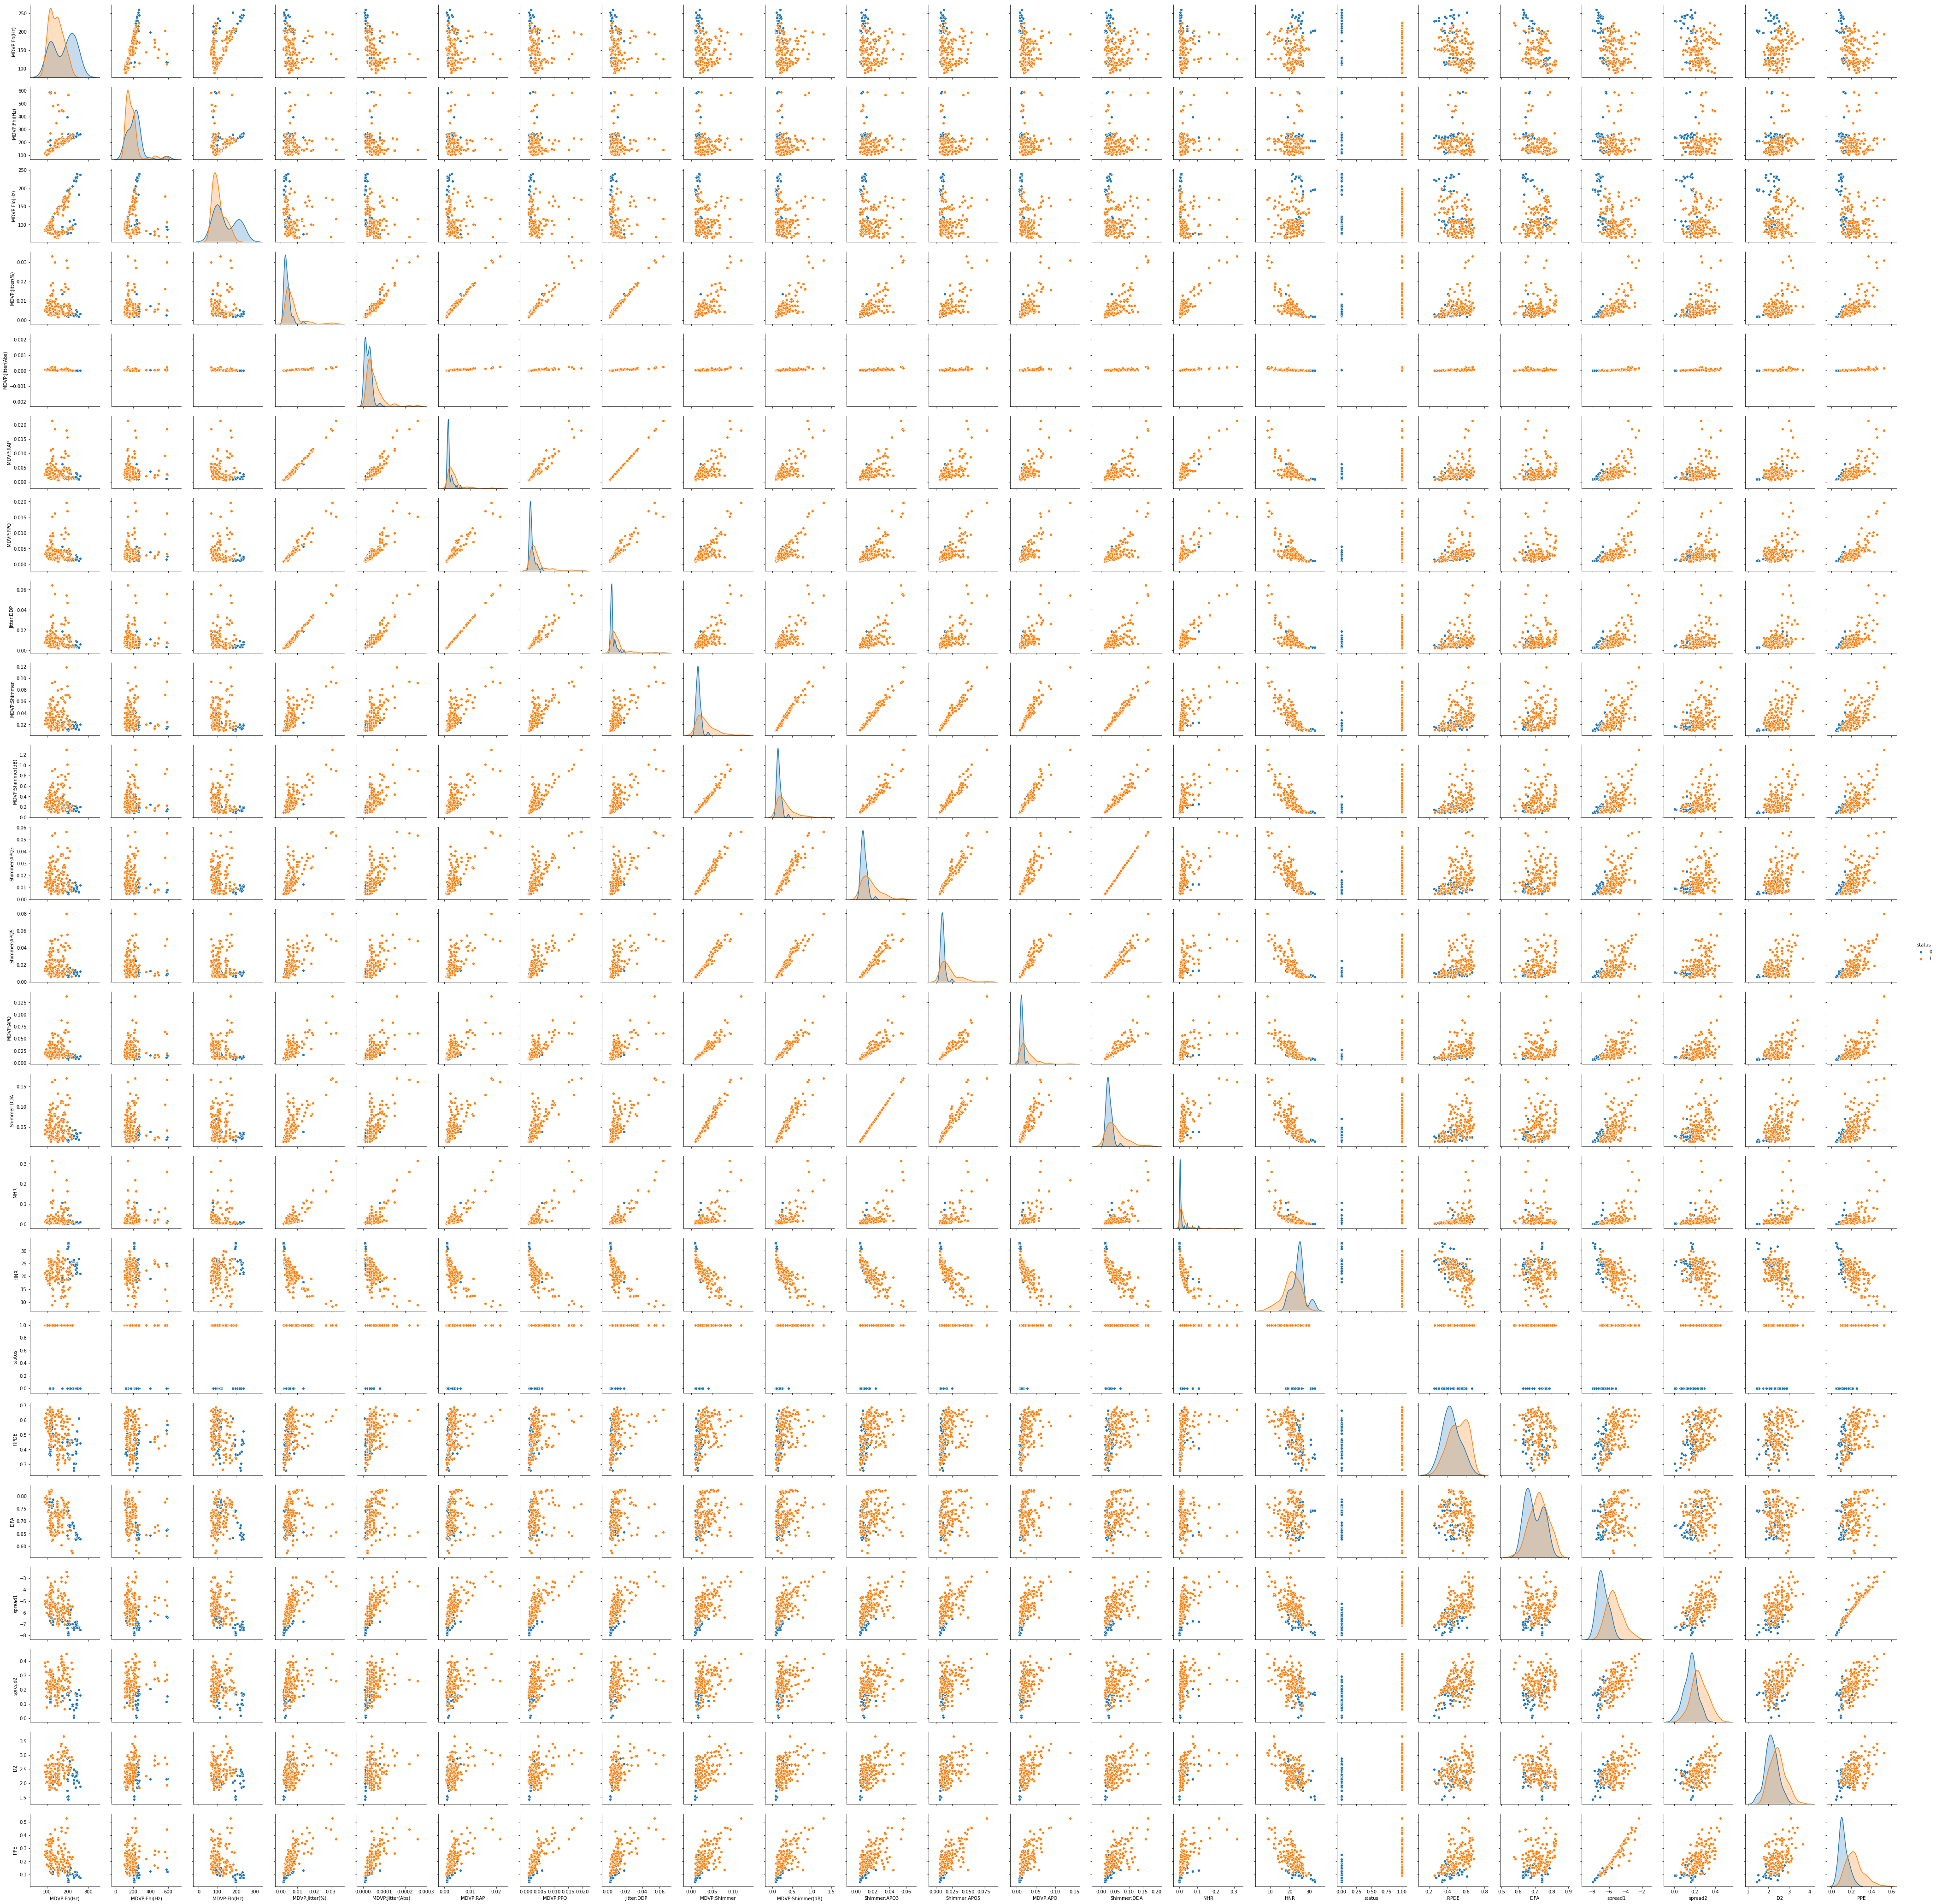

In [0]:
sns.pairplot(pt_df, hue="status")

# Observations



1.   If MDVP:Fo(Hz) is in the range of 110 to 170 then the possibility of being diagnosed with PD in higher and higher MDVP:Fo(Hz) leads to healthier person
2.   Lower the value of MDVP:Fhi(Hz) ranging from 100-200 have higher possibility of getting diagnosed with PD 
3.   Lower the value of MDVP:Flo(Hz) ranging from 60-120 have higher possibility of getting diagnosed with PD
4.    MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP are directly propotional to the PD. Higher the value of these attributes, results in higher probability of being diagnosed with PD
5.   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA, NHR are directly propotional to the PD. Higher the value of these attributes, results in higher probability of being diagnosed with PD
6.   HNR is inversely propotionate to being diagnosed with PD
7. 19 attributes have outliers available , so normalization is required in the data set



# Split the dataset into training and test set in the ratio of 70:30 (Training:Test).




In [0]:
pt_df.drop('name',inplace=True, axis=1)
X = pt_df.drop('status', axis=1)

y = pt_df[['status']]

In [0]:
X

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=28)

# Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [44]:
dct = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [0]:
y_predict = dct.predict(X_test)

In [46]:
print(y_predict.shape)
print(y_test.shape)

(59,)
(59, 1)


In [47]:
y_test['status']

99     1
159    1
166    0
50     0
124    1
173    0
135    1
136    1
119    1
61     0
183    0
96     1
67     1
54     1
63     0
98     1
70     1
178    1
65     0
21     1
24     1
177    1
53     0
133    1
59     1
47     0
142    1
51     0
128    1
0      1
115    1
112    1
168    0
117    1
89     1
146    1
15     1
85     1
164    1
192    0
175    0
78     1
169    0
49     0
163    1
137    1
138    1
18     1
13     1
126    1
11     1
110    1
73     1
52     0
14     1
144    1
127    1
174    0
158    1
Name: status, dtype: int64

In [48]:
print(dct.score(X_train , y_train))
print(dct.score(X_test , y_test))

1.0
0.864406779661017


In [49]:
print(metrics.confusion_matrix(y_test['status'], y_predict))

[[13  4]
 [ 4 38]]


In [50]:
for key in list(X_test): 
    print(key) 

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE


In [51]:
for key in list(X_test): 
  print(pd.crosstab(y_test['status'], X_test[key],dropna=True))

MDVP:Fo(Hz)  91.904   95.385   102.273  ...  237.323  240.301  252.455
status                                  ...                           
0                  0        0        0  ...        1        1        1
1                  1        1        1  ...        0        0        0

[2 rows x 59 columns]
MDVP:Fhi(Hz)  102.145  115.871  116.443  ...  450.247  492.892  588.518
status                                   ...                           
0                   0        0        1  ...        0        0        0
1                   1        1        0  ...        1        1        1

[2 rows x 59 columns]
MDVP:Flo(Hz)  65.476   66.004   68.623   ...  219.783  223.634  229.256
status                                   ...                           
0                   0        0        0  ...        1        1        1
1                   1        1        1  ...        0        0        0

[2 rows x 59 columns]
MDVP:Jitter(%)  0.00185  0.00238  0.00254  ...  0.01378  0.01568  0.019

In [52]:
pd.crosstab(y_test['status'], X_test["PPE"],dropna=True)

PPE,0.086398,0.091546,0.09160399999999999,0.093534,0.09855499999999999,0.100881,0.10356099999999999,0.105993,0.112856,0.119308,0.12887200000000001,0.13172799999999998,0.132703,0.141422,0.147491,0.15170899999999998,0.159777,0.160306,0.163118,0.1701,0.179677,0.180828,0.181988,0.184067,0.196535,0.199889,0.200423,0.202879,0.209191,0.20986300000000002,0.21238600000000002,0.214075,0.21572399999999997,0.21596100000000001,0.216638,0.22065700000000002,0.22546100000000002,0.22624699999999998,0.228319,0.23251999999999998,0.234589,0.249703,0.25945100000000004,0.259765,0.260015,0.260375,0.268144,0.274387,0.274407,0.275931,0.28278000000000003,0.284654,0.316395,0.3167,0.332086,0.367233,0.377429,0.378483,0.45753299999999997
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


crosstab summarizes the data for the two rows and shows that how many record for that particular row lies for the corresponding values of another row

# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [54]:
highestAcc=0.0
for i in range(1, 41):
  for j in range(1, 41): 
    reg_dct_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, min_samples_leaf=j, random_state=51)
    reg_dct_model.fit(X_train, y_train)
    reg_y_predict = dct.predict(X_test)
    regScore=reg_dct_model.score(X_test , y_test)
    if regScore > highestAcc :
      print('For max_depth=',i, ' and Min Sample Leaf=', j, ' the accuracy is:',regScore)
      highestAcc = regScore
    

For max_depth= 1  and Min Sample Leaf= 1  the accuracy is: 0.864406779661017
For max_depth= 5  and Min Sample Leaf= 1  the accuracy is: 0.8983050847457628


For random state as 51 the best accuracy score achieved is 89.83% for the value as following: max_depth= 5  and Min Sample Leaf= 1

Regularizing has helped us to achieve a better accuracy score from 86.4% to 89.83%

# Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
X_test.shape

(59, 22)

In [68]:
highestAcc=0.0
#random_state
for j in range(1, 101):
  rfcl = RandomForestClassifier(n_estimators = j, random_state=29)
  rfcl = rfcl.fit(X_train, y_train['status'])
  y_predict = rfcl.predict(X_test)
  regScore = rfcl.score(X_test , y_test['status'])
  if regScore > highestAcc :
    print('Accuracy Score for value of no of trees as ',j, ' is ', regScore, '%')
    highestAcc = regScore


Accuracy Score for value of no of trees as  1  is  0.864406779661017 %
Accuracy Score for value of no of trees as  6  is  0.8813559322033898 %
Accuracy Score for value of no of trees as  7  is  0.9322033898305084 %


**Best accuracy achieved is 93.22% with no of trees as 7**

Just tried to improve the efficiency using kFold. However, the accuracy score is not getting improved


In [0]:
rfcl = RandomForestClassifier(n_estimators = 7, random_state=29)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

kfold = KFold(n_splits=10, random_state=77, shuffle=False)

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
X2 = scaler.fit_transform(X)
y2 = scaler.fit_transform(y)

In [0]:
kfold = KFold(n_splits=10, random_state=77, shuffle=False)

In [76]:
for train_index, test_index in kfold.split(X2):
  X1_train, X1_test = X2[train_index], X2[test_index]
  y1_train, y1_test = y2[train_index], y2[test_index]
  res = cross_val_score(rfcl, X1_train, y1_train, cv=kfold)
print(res)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

[0.94444444 0.88888889 0.55555556 1.         1.         0.88888889
 0.94117647 0.82352941 0.94117647 0.64705882]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

In [77]:
print("Accuracy Mean Score is: ", res.mean()*100.0, "%")

Accuracy Mean Score is:  86.30718954248366 %
